# Climate change and economics

___________

This is for a python workshop with economics students to assess whether economists shouldsuggest policies to address the climate crisis.

The brief: The Bank of England have recently carried out a review on how climate change might affect the financial services sector. They are also looking at how the Bank can ensure financial resilience at the UK transitions to a low carbon economy. Some groups have been critical of this approach. You are asked to suggest why there might there a case for economists and the BoE to prioritise the climate crisis.

# Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#### A word of caution when using geopandas

You need to make sure you carefully follow the installation documentation. 
You can read it here: https://geopandas.readthedocs.io/en/latest/install.html

When using conda, make sure you use this new environment 'geo_env' so that you don't have any conflicts when using geopandas. 

# Import data

This will be a more discursive task. There is no correct answer and there will be a few datasets you'll be using to get an idea of what the issue is and why this might be an issue for economists. 

* The data has been taken from the OECD and is available <a href="https://data.oecd.org/air/air-pollution-exposure.htm">here</a> 

* Data on the economic impact of climate change is available <a href="https://web.stanford.edu/~mburke/climate/data.html">here</a>, cite: Burke, Hsiang, and Miguel (2015)

* Website used for shapefiles <a href="https://www.naturalearthdata.com/downloads/110m-cultural-vectors/">here</a> then use 'Download Countries version 4.1.0'

In [2]:
airpoll= pd.read_csv('OCED(2019)Airpollution_exposure.csv',index_col='LOCATION')

In [3]:
airpoll.head()

,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
LOCATION,,,,,,,
AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,1990,10.36402,NaN
AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,1995,10.41745,NaN
AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2000,10.73562,NaN
AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2005,10.52515,NaN
AUS,POLLUTIONEXP,EXPOS2PM25,MICGRCUBM,A,2010,10.53559,NaN


# Inspect the data 

Once you import the data, you want to look at what data is telling us and how we can use it.

Need to get to know the data you're using before doing any analysis. 

Note down some of the interesting stats from here - this will be helpful when giving your presentation

In [4]:
airpoll.shape

(4056, 7)

In [5]:
airpoll.describe()

,TIME,Value,Flag Codes
count,4056.000000,4056.000000,0.0
mean,2008.166667,60.638246,NaN
std,8.415641,37.147763,NaN
min,1990.000000,0.000000,NaN
25%,2003.750000,23.208385,NaN
50%,2011.500000,60.455920,NaN
75%,2014.250000,99.756260,NaN
max,2017.000000,103.193240,NaN


In [6]:
impact= pd.read_csv('Burke, Hsiang, and Miguel (2015) GDPcap_ClimateChange.csv',index_col='ISO3')

In [7]:
impact.head()

,ISO2,name,meantemp,2010,2011,2012,2013,2014,2015,2016,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
ISO3,,,,,,,,,,,,,,,,,,,,,
AFG,AF,Afghanistan,13.127500,282.958,290.060,297.081,304.005,310.817,317.500,325.571,...,11974.321,12241.311,12505.167,12765.380,13021.435,13272.815,13524.757,13777.059,14029.511,14281.896
AGO,AO,Angola,22.054800,1560.830,1603.048,1650.009,1702.049,1759.546,1822.926,1881.676,...,5930.291,5864.547,5793.645,5717.772,5637.129,5551.928,5464.681,5375.513,5284.548,5191.914
ALB,AL,Albania,13.419000,2119.348,2158.593,2201.943,2249.603,2301.801,2358.793,2421.267,...,14710.679,14856.468,15001.151,15144.625,15286.786,15427.527,15565.570,15700.774,15832.999,15962.104
ARE,AE,United Arab Emirates,26.918710,47664.018,48300.015,48938.726,49579.891,50223.244,50868.507,51553.339,...,18112.293,17523.426,16955.071,16406.472,15876.904,15365.668,14870.893,14392.050,13928.626,13480.124
ARG,AR,Argentina,17.335556,5021.410,5195.854,5372.299,5550.531,5730.325,5911.443,6102.834,...,23599.125,23641.760,23676.796,23704.166,23723.810,23735.674,23741.232,23740.447,23733.286,23719.723


In [8]:
impact.describe()

,meantemp,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,18.742249,8050.288103,8197.738491,8354.396794,8520.415915,8696.048364,8881.658455,9075.775358,9278.750618,9490.982018,...,51333.566248,52799.195145,5.433159e+04,5.593459e+04,5.761228e+04,5.936900e+04,6.120930e+04,6.313796e+04,6.515997e+04,6.728067e+04
std,7.479807,12699.537898,12894.824788,13100.120856,13314.514500,13537.207337,13767.543878,14002.084230,14240.597438,14482.866588,...,107056.748152,112083.374246,1.174043e+05,1.230390e+05,1.290082e+05,1.353344e+05,1.420346e+05,1.491337e+05,1.566582e+05,1.646368e+05
min,-0.733448,148.956000,155.802000,163.001000,170.573000,178.537000,186.917000,196.112000,206.201000,217.274000,...,2250.378000,2185.999000,2.120564e+03,2.052626e+03,1.984893e+03,1.917485e+03,1.850926e+03,1.785284e+03,1.720623e+03,1.657001e+03
25%,11.922667,683.894000,704.046000,719.368000,749.556000,773.272000,806.475000,835.361000,868.071000,907.854000,...,6482.497000,6392.905000,6.330867e+03,6.218161e+03,6.117445e+03,6.015706e+03,5.997295e+03,5.967513e+03,5.828372e+03,5.688633e+03
50%,20.767742,2255.577000,2263.748000,2280.708000,2318.680000,2449.605000,2532.704000,2688.839000,2857.542000,3024.582000,...,12276.687000,12253.912000,1.210757e+04,1.192248e+04,1.174644e+04,1.156397e+04,1.160192e+04,1.179301e+04,1.195561e+04,1.169021e+04
75%,25.498710,7761.720000,8018.317000,8276.797000,8536.778000,8797.859000,9059.622000,9331.452000,9613.763000,9906.988000,...,43054.576000,43822.153000,4.504640e+04,4.627844e+04,4.751694e+04,4.876051e+04,4.960205e+04,5.024323e+04,5.088349e+04,5.152245e+04
max,28.604194,59060.335000,59373.218000,60735.006000,63153.032000,65440.329000,67575.077000,69673.662000,71728.147000,73730.529000,...,914720.029000,964676.699000,1.017745e+06,1.074136e+06,1.134074e+06,1.197800e+06,1.265521e+06,1.337504e+06,1.414037e+06,1.495428e+06


In [9]:
impact.shape

(165, 93)

# Create cloropleth map

It's easier to visualise the scale of the issue. 

A Cholorpheth map is a type of 'heat map' 

More to read on formatting maps: http://geopandas.org/mapping.html 

In [10]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(impact, left_on = 'country_code', right_on = 'ISO3')

In [12]:
merged.head()

,country,country_code,geometry,ISO2,name,meantemp,2010,2011,2012,2013,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJ,Fiji,23.803871,3116.961,3158.028,3202.683,3251.056,...,25433.979,25434.271,25419.949,25391.006,25347.462,25289.364,25221.635,25144.329,25057.509,24961.250
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZ,Tanzania,22.486364,322.588,334.438,347.207,360.963,...,5054.452,5003.556,4948.440,4889.239,4826.103,4759.187,4690.459,4620.014,4547.948,4474.361
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,Canada,5.869355,30174.595,30596.093,31042.600,31514.914,...,338380.003,351936.926,366108.730,380924.502,396414.730,412611.364,429518.184,447166.621,465589.461,484820.900
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,United States,13.625806,36036.258,36665.406,37349.754,38091.811,...,88280.182,88585.748,88877.946,89156.387,89420.681,89670.445,89896.690,90098.975,90276.875,90429.985
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KZ,Kazakhstan,6.344000,3029.880,3185.693,3351.309,3527.407,...,59886.865,61925.918,64038.237,66226.352,68492.871,70840.481,73275.065,75799.793,78417.943,81132.901


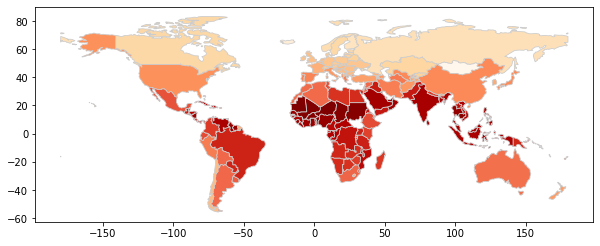

In [14]:
# set a variable that will call whatever column we want to visualise on the map
meantemp = 'meantemp'
# set the range for the choropleth
vmin, vmax = 100, 250
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=meantemp, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')